In [1]:
from brian2 import *
%matplotlib inline

In [3]:
common = {
'vl' : -70 * mV,
'vt' : -50*mV,
'vr' : -55*mV,
've' : 0*mV,
'vi' : -70*mV,
'ta' : 2 * ms,
'tn' : 100 * ms,
'tn_rise' : 2 * ms,
'tg' : 5 * ms,
'alpha' : 0.5 / ms,
'duration' : 1000 * ms
}

exc = {
'c_m' : 0.5 * nF,
'gl' : 25 * nS,
'gn' : 0.165 * nS,
'gg' : 1.3 * nS,
'ga' : 2.1 * nS,
}
exc.update(common)

inh = {
'c_m' : 0.2 * nF,
'gl' : 20 * nS,
'gn' : 0.13 * nS,
'gg' : 1.0 * nS,
'ga' : 1.62 * nS
}
inh.update(common)

INFO       No numerical integration method specified for group 'neurongroup_1', using method 'euler' (took 0.04s, trying other methods took 0.02s). [brian2.stateupdaters.base.method_choice]


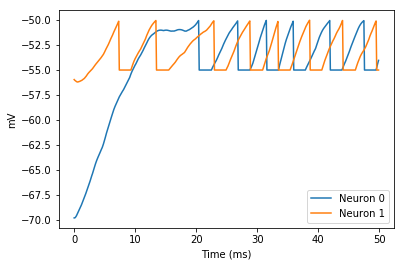

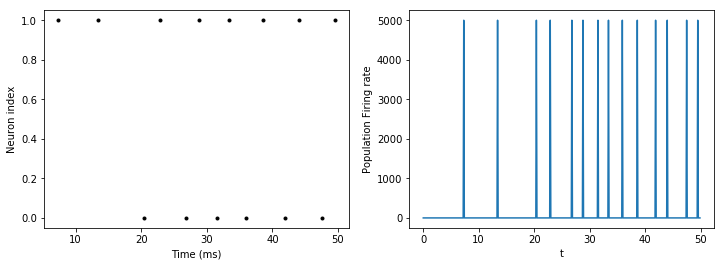

In [5]:
# Eventually do something like this
# def iaf_model(g_ampa, g_nmda, g_gaba)
start_scope()

eqs = '''
dv/dt = (-gl * (v - vl) - isyn) / c_m : volt (unless refractory)
dx/dt = -x / tn_rise : 1
dsn/dt = -sn / tn + alpha * x * (1 - sn) : 1
dsa/dt = -sa / ta : 1
dsg/dt = -sg / tg : 1
ia = ga * sa * (v - ve) : amp
ig = gg * sg * (v - vi) : amp
nmda = (1 + e ** (-0.062*v / (1 * volt)) / 3.57) : 1
inm = gn * sn * (v - ve) / nmda : amp
isyn = ia + inm + ig : amp
'''

G = NeuronGroup(2, eqs, namespace= exc, threshold='v>vt', reset='v=vr', refractory=2*ms)
G.v = '(15*rand() - 70) * mV'

background = PoissonGroup(1, 2400*Hz)
S_back = Synapses(background, G,
              on_pre='''sa_post += 1''')
S_back.connect()

p1 = PoissonInput(G, 'sa', N=1, rate=2400 * Hz, weight=1)
# S_back.delay = '5*ms'

# S = Synapses(G, G, on_pre='''
#              sa_post += 1
#              x_post += 1
#              sg_post += 1
#              ''')
# S.connect()
                
M = StateMonitor(G, 'v', record=True)
N = SpikeMonitor(G)
O = PopulationRateMonitor(G)
run(50 * ms)

plot(M.t/ms, 1000*M.v[0], label='Neuron 0')
plot(M.t/ms, 1000*M.v[1], label='Neuron 1')
xlabel('Time (ms)')
ylabel('mV')
legend();

figure(figsize=(12,4))
subplot(121)
plot(N.t/ms, N.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
subplot(122)
plot(O.t/ms, O.rate/Hz)
xlabel('t')
ylabel('Population Firing rate')